In [22]:
from model import layers, activations, networks, utils, optimizers, losses, metrics, paddings
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [23]:
(x_train , y_train), (x_test , y_test) = keras.datasets.mnist.load_data()
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [24]:
x_train = x_train / 255
x_test = x_test / 255

x_train = utils.expand_dims(x_train, 4)
y_train = utils.expand_dims(y_train, 2)
x_test = utils.expand_dims(x_test, 4)
y_test = utils.expand_dims(y_test, 2)

print (f'x_train shape={x_train.shape}')
print (f'y_train shape={y_train.shape}')
print (f'x_test shape={x_test.shape}')
print (f'y_test shape={y_test.shape}')

x_train shape=(60000, 28, 28, 1)
y_train shape=(60000, 10)
x_test shape=(10000, 28, 28, 1)
y_test shape=(10000, 10)


In [25]:
x_train = x_train[:500]
y_train = y_train[:500]
x_test = x_test[:500]
y_test = y_test[:500]

In [26]:
print (f'x_train shape={x_train.shape}')
print (f'y_train shape={y_train.shape}')
print (f'x_test shape={x_test.shape}')
print (f'y_test shape={y_test.shape}')

x_train shape=(500, 28, 28, 1)
y_train shape=(500, 10)
x_test shape=(500, 28, 28, 1)
y_test shape=(500, 10)


In [27]:
model = networks.FeedForward([
    layers.Input(input_shape=(28, 28, 1)),
    layers.Convolution(nr_kernels=4, kernel_size=(3, 3), activation=activations.ReLu),
    layers.Flatten(),
    layers.Dense(nr_neurons=10, activation=activations.Softmax),
    layers.Output()
])

In [28]:
model.compile(
    optimizer=optimizers.stochastic_gradient_descent(learning_rate=0.01, momentum=0.5, nesterov=True),
    loss=losses.categorical_crossentropy,
    metric=metrics.Accuracy)

In [29]:
model.train(x_train, y_train, epochs=5)

epoch 1/5	loss=10.6266	time/epoch=20408.48ms
epoch 2/5	loss=10.3139	time/epoch=20403.97ms
epoch 3/5	loss=9.6564	time/epoch=20426.89ms
epoch 4/5	loss=8.7856	time/epoch=20406.55ms
epoch 5/5	loss=7.9735	time/epoch=20432.37ms


In [ ]:
model.evaluate(x_test, y_test)

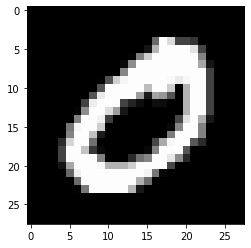

In [30]:
i = random.randint(0, len(x_train))
image = x_train[i]
p = model.predict(image)
plt.imshow(image, cmap='gray')

<BarContainer object of 10 artists>

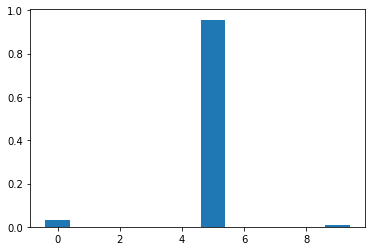

In [31]:
plt.bar(np.arange(0, 10), p.reshape(10,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


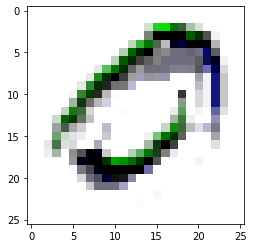

In [33]:
plt.imshow(model.layers[1].o, cmap='gray')